In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
titanic_data = pd.read_csv('titanic_train.csv')

In [7]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

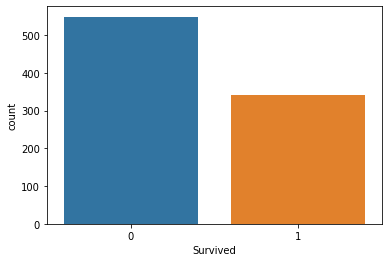

In [9]:
sns.countplot(x = 'Survived', data = titanic_data)

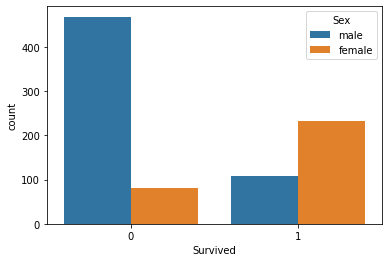

In [10]:
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic_data)

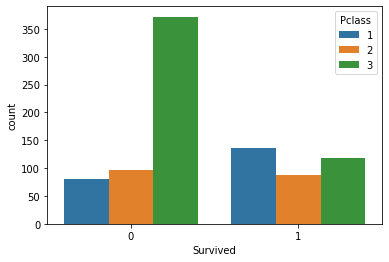

In [11]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic_data)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

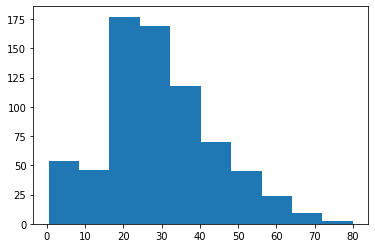

In [12]:
plt.hist(titanic_data['Age'].dropna())

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

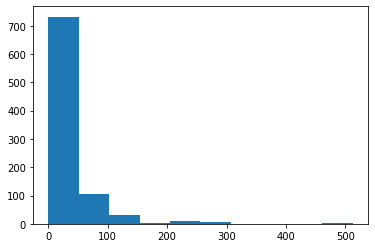

In [13]:
plt.hist(titanic_data['Fare'])

In [14]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


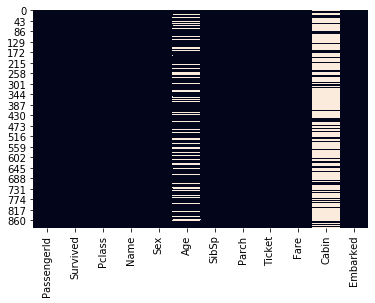

In [15]:
sns.heatmap(titanic_data.isnull(), cbar = False)

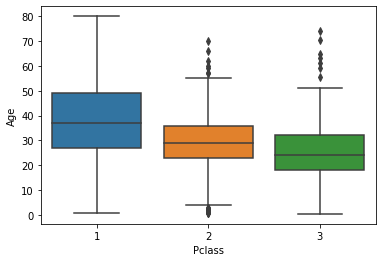

In [16]:
sns.boxplot(titanic_data['Pclass'], titanic_data['Age'])

In [17]:
def impute_missing_age(columns) :
    age = columns[0]
    passenger_class = columns[1]

    # Check if Age value is missing.
    if pd.isnull(age) :
        if (passenger_class == 1) :
            # Return average value of Pclass 1.
            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()
        elif (passenger_class == 2) :
            # Return average value of Pclass 2.
            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()
        elif (passenger_class == 3) :
            # Return average value of Pclass 3.
            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()
    else :
        return age

In [18]:
titanic_data['Age'] = titanic_data[['Age','Pclass']].apply(impute_missing_age, axis = 1)

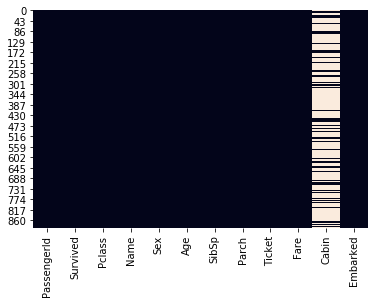

In [19]:
sns.heatmap(titanic_data.isnull(), cbar = False)

In [20]:
titanic_data.drop('Cabin', axis = 1, inplace = True)

In [21]:
titanic_data.dropna(inplace = True)

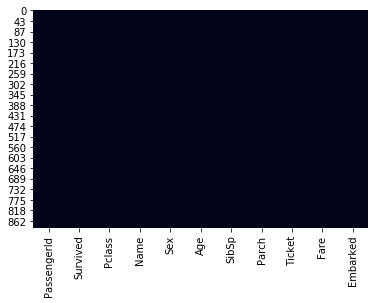

In [22]:
sns.heatmap(titanic_data.isnull(), cbar = False)

In [23]:
pd.get_dummies(titanic_data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [24]:
sex_data = pd.get_dummies(titanic_data['Sex'], drop_first = True)

In [25]:
embarked_data = pd.get_dummies(titanic_data['Embarked'], drop_first = True)

In [26]:
titanic_data = pd.concat([titanic_data, sex_data, embarked_data], axis = 1)

In [27]:
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')


In [28]:
titanic_data.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

In [29]:
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')


In [30]:
y_data = titanic_data['Survived']
x_data = titanic_data.drop('Survived', axis = 1)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression(max_iter = 1000)

In [35]:
model.fit(x_training_data, y_training_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
predictions = model.predict(x_test_data)

In [37]:
from sklearn.metrics import classification_report

In [38]:
classification_report(y_test_data, predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.86      0.83       160\n           1       0.77      0.70      0.73       107\n\n    accuracy                           0.79       267\n   macro avg       0.79      0.78      0.78       267\nweighted avg       0.79      0.79      0.79       267\n'

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
print (confusion_matrix(y_test_data, predictions))

[[137  23]
 [ 32  75]]
